In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


df = pd.read_csv("Air_quality.csv")
df.head()


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


In [34]:
df.info()
df.columns

print("\nSummary Stats for Numbers:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unique ID       18862 non-null  int64         
 1   Indicator ID    18862 non-null  int64         
 2   Name            18862 non-null  object        
 3   Measure         18862 non-null  object        
 4   Measure Info    18862 non-null  object        
 5   Geo Type Name   18862 non-null  object        
 6   Geo Join ID     18862 non-null  int64         
 7   Geo Place Name  18862 non-null  object        
 8   Time Period     18862 non-null  object        
 9   Start_Date      18862 non-null  datetime64[ns]
 10  Data Value      18862 non-null  float64       
 11  Message         0 non-null      float64       
 12  Year            18862 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(6)
memory usage: 1.8+ MB

Summary Stats for N

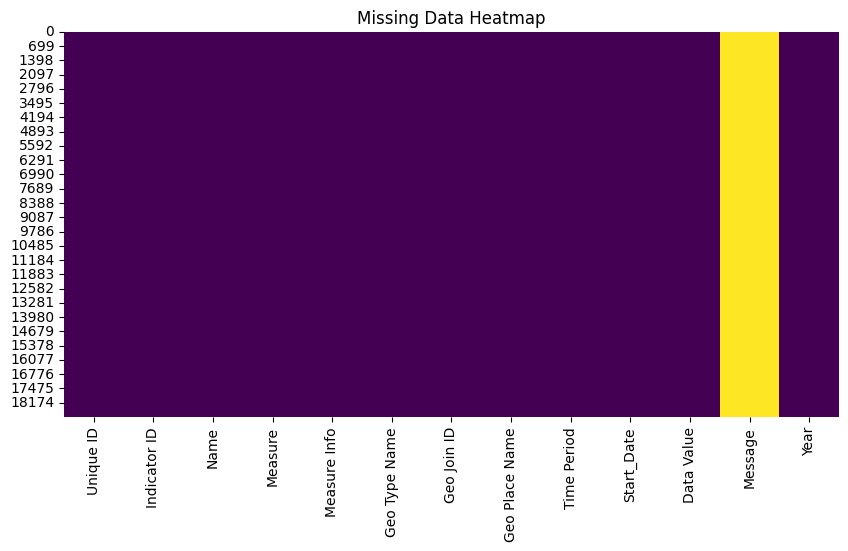

In [35]:
df.isnull().sum()
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [36]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_rows}")

df.columns = df.columns.str.strip()  # Removes extra spaces
df['Data Value'] = pd.to_numeric(df['Data Value'], errors='coerce')


Duplicate Rows: 0


Missing Data Summary:
Message    18862
dtype: int64


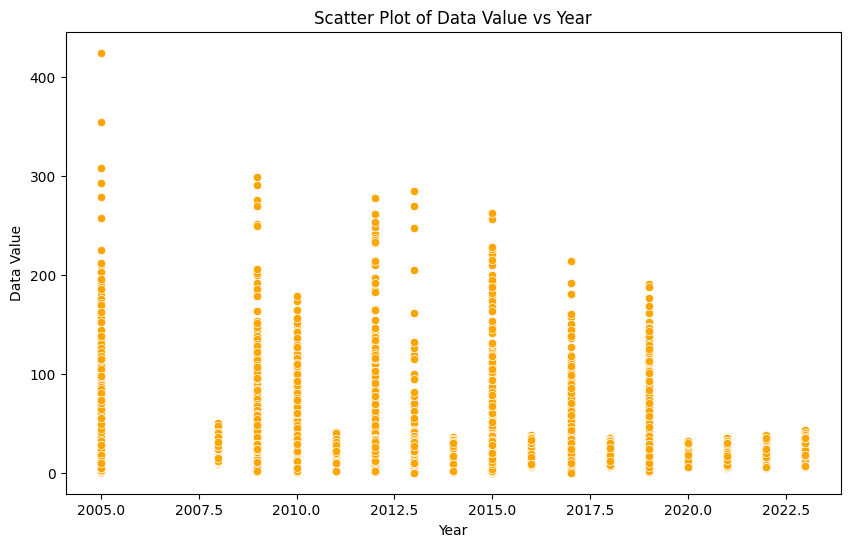

In [37]:

missing_summary = df.isnull().sum()
print("Missing Data Summary:")
print(missing_summary[missing_summary > 0])


# Scatter plot between 'Data Value' and 'Year'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Year'], y=df['Data Value'], color='orange')
plt.title("Scatter Plot of Data Value vs Year")
plt.xlabel("Year")
plt.ylabel("Data Value")
plt.show()



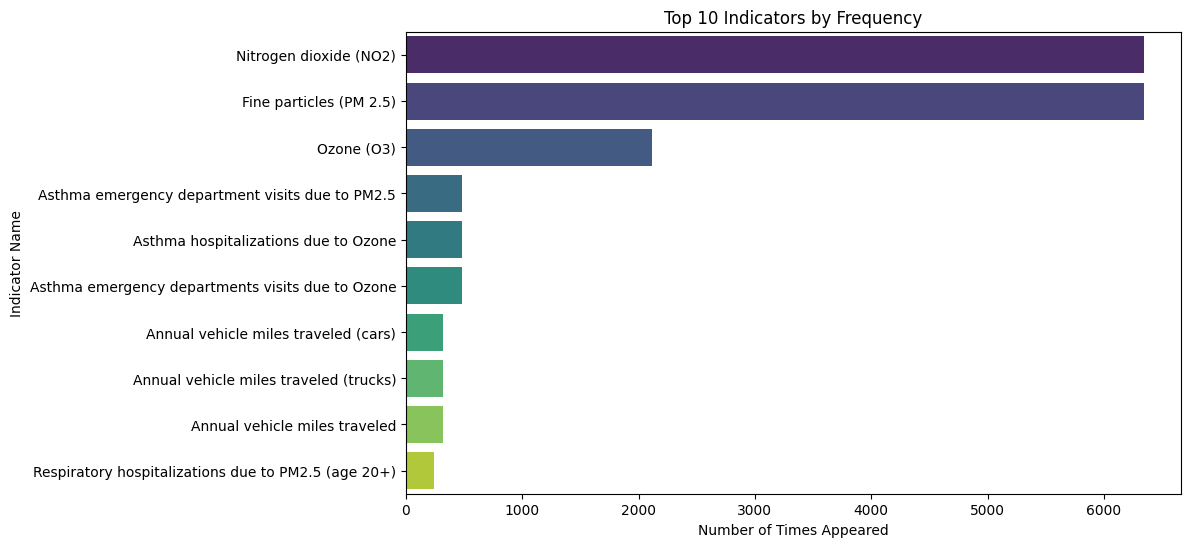

In [38]:
top_indicators = df['Name'].value_counts().head(10)

top_df = pd.DataFrame({
    'Indicator': top_indicators.index,
    'Frequency': top_indicators.values
})

plt.figure(figsize=(10, 6))
sns.barplot(data=top_df, x='Frequency', y='Indicator', hue='Indicator', dodge=False, palette="viridis", legend=False)

# ✅ Add title and labels
plt.title("Top 10 Indicators by Frequency")
plt.xlabel("Number of Times Appeared")
plt.ylabel("Indicator Name")

plt.show()




In [39]:
print("\n Summary Stats for Numbers:")
print(df.describe())


 Summary Stats for Numbers:
           Unique ID  Indicator ID   Geo Join ID  \
count   18862.000000  18862.000000  1.886200e+04   
mean   452004.167533    431.817888  5.983262e+05   
min    130355.000000    365.000000  1.000000e+00   
25%    176073.250000    365.000000  2.020000e+02   
50%    412490.500000    375.000000  3.030000e+02   
75%    669588.750000    386.000000  4.040000e+02   
max    878254.000000    661.000000  1.051061e+08   
std    262910.731230    113.946565  7.819721e+06   

                          Start_Date    Data Value  Message          Year  
count                          18862  18862.000000      0.0  18862.000000  
mean   2015-03-01 00:12:40.385961216     21.051580      NaN   2014.719542  
min              2005-01-01 00:00:00      0.000000      NaN   2005.000000  
25%              2011-06-01 00:00:00      8.742004      NaN   2011.000000  
50%              2015-01-01 00:00:00     14.790000      NaN   2015.000000  
75%              2019-01-01 00:00:00     26.26

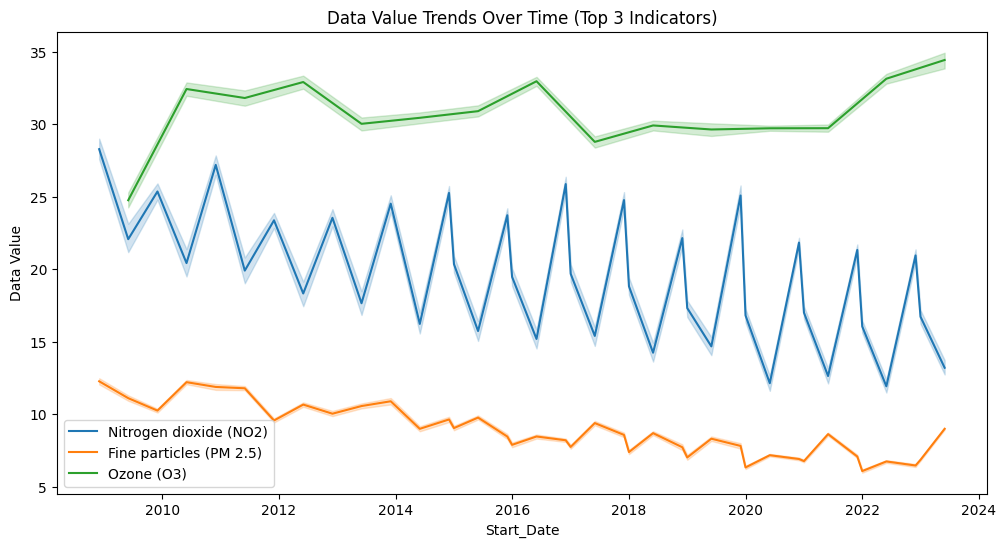

In [40]:

top_names = df['Name'].value_counts().head(3).index
plt.figure(figsize=(12, 6))
for name in top_names:
    temp = df[df['Name'] == name].sort_values('Start_Date')
    sns.lineplot(x='Start_Date', y='Data Value', data=temp, label=name)
plt.title("Data Value Trends Over Time (Top 3 Indicators)")
plt.legend()
plt.show()


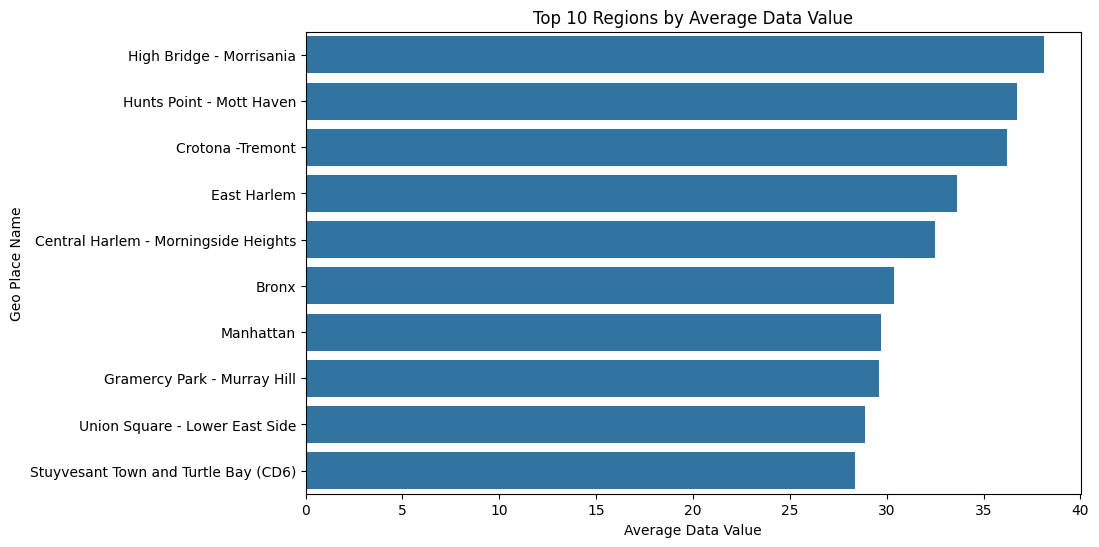

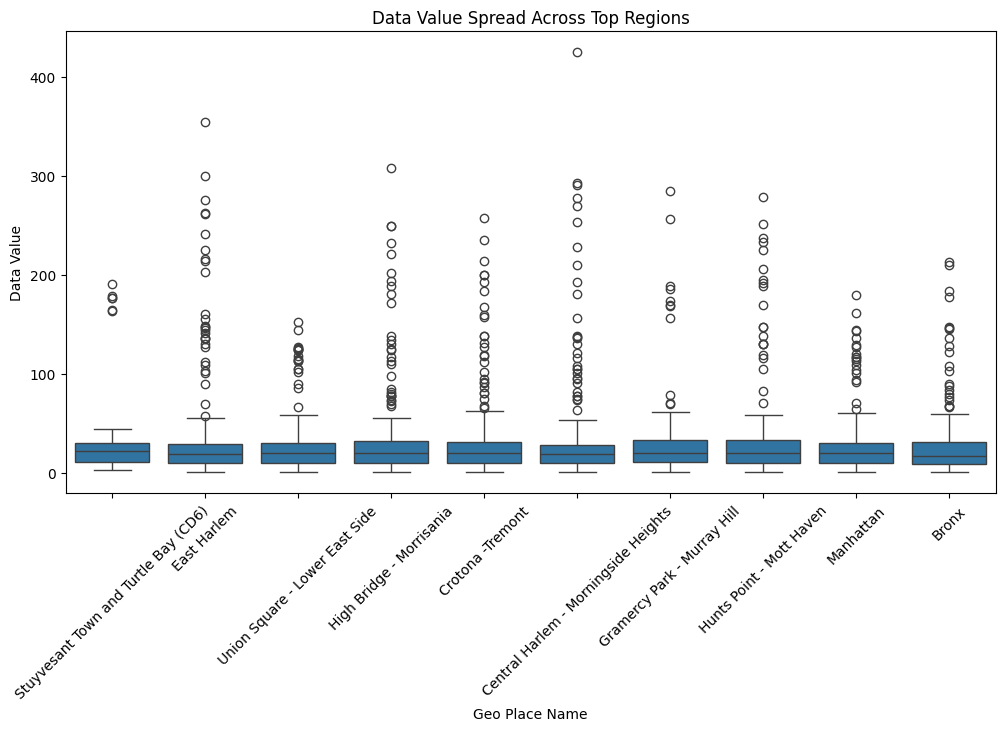

In [41]:
geo_avg = df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))  
sns.barplot(x=geo_avg.values, y=geo_avg.index)  
plt.title("Top 10 Regions by Average Data Value") 
plt.xlabel("Average Data Value")  
plt.ylabel("Geo Place Name") 
plt.show() 

plt.figure(figsize=(12, 6))  
sns.boxplot(x='Geo Place Name', y='Data Value', data=df[df['Geo Place Name'].isin(geo_avg.index)])  
plt.xticks(rotation=45) 
plt.title("Data Value Spread Across Top Regions")  
plt.show()  

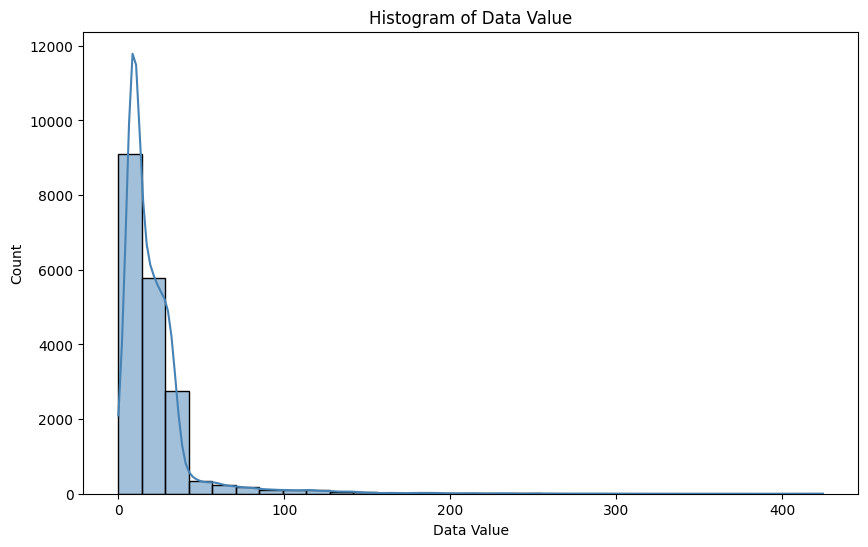

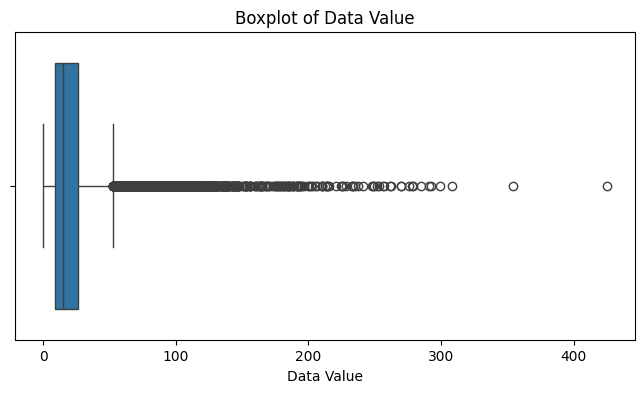

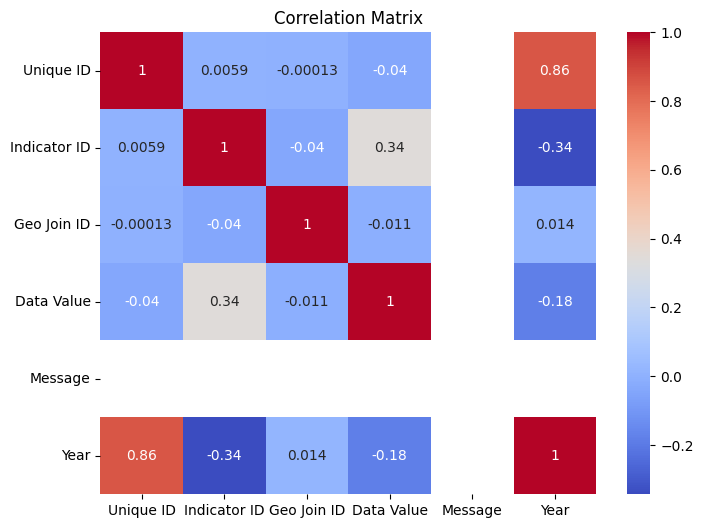

In [42]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df['Data Value'], bins=30, kde=True, color='steelblue') 
plt.title("Histogram of Data Value")
plt.show()  


plt.figure(figsize=(8, 4))  
sns.boxplot(x='Data Value', data=df)  
plt.title("Boxplot of Data Value")  
plt.show() 

numeric_cols = df.select_dtypes(include=np.number)  

if numeric_cols.shape[1] > 1:
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')  
    plt.title("Correlation Matrix") 
    plt.show()  

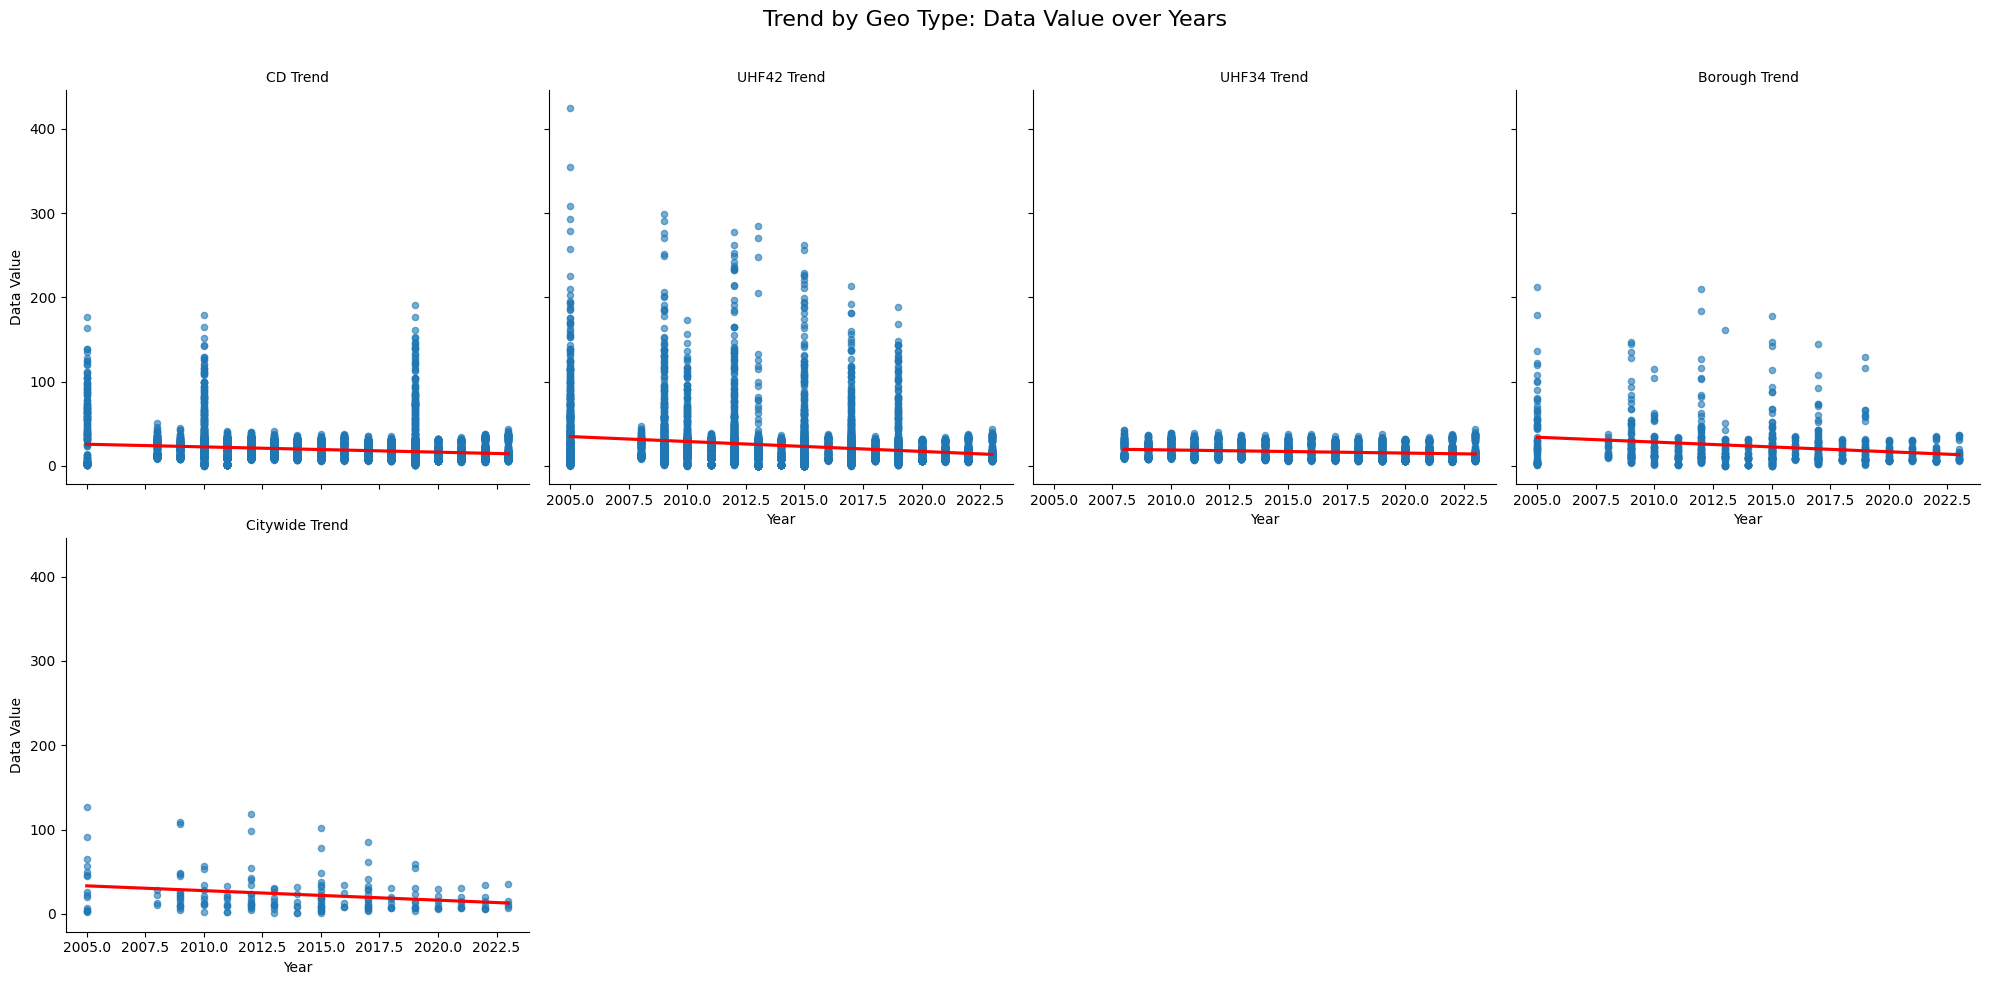

In [43]:
df['Year'] = df['Year'].astype(int)

grid = sns.FacetGrid(df, col='Geo Type Name', col_wrap=4, height=5)

grid.map(sns.regplot, 'Year', 'Data Value', scatter_kws={'s': 20, 'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)

grid.set_axis_labels("Year", "Data Value")
grid.set_titles(col_template="{col_name} Trend")

plt.subplots_adjust(top=0.9)
grid.fig.suptitle("Trend by Geo Type: Data Value over Years", fontsize=16)
plt.show()


Outliers in 'Data Value' Column:
954      118.077027
1240      74.854797
1241      77.168459
1377      75.000000
1697     130.592177
            ...    
18782    114.600000
18784     55.300000
18786     99.000000
18797     58.000000
18814     73.600000
Name: Data Value, Length: 990, dtype: float64


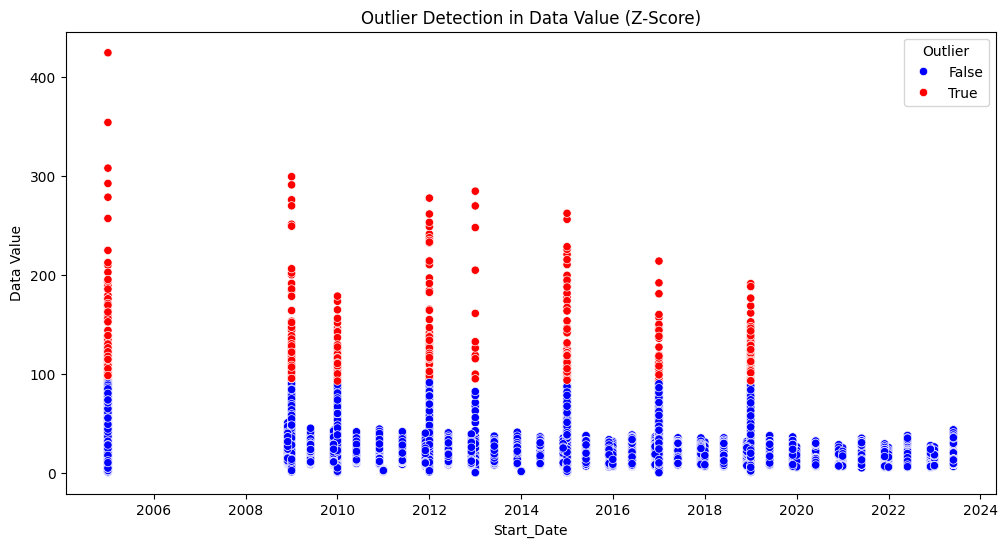

In [44]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = detect_outliers_iqr(df['Data Value'])
print("\nOutliers in 'Data Value' Column:")
print(outliers)

df['zscore'] = zscore(df['Data Value'].fillna(0))
df['Outlier'] = np.abs(df['zscore']) > 3

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Start_Date', y='Data Value', hue='Outlier', data=df, palette={True: 'red', False: 'blue'})
plt.title("Outlier Detection in Data Value (Z-Score)")
plt.show()

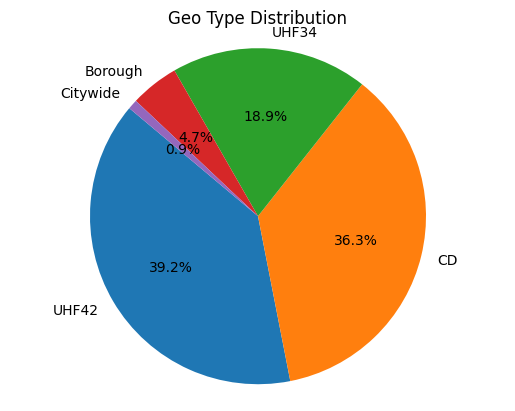

In [45]:
geo_counts = df['Geo Type Name'].value_counts()
plt.pie(geo_counts, labels=geo_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Geo Type Distribution")
plt.axis('equal')
plt.show()

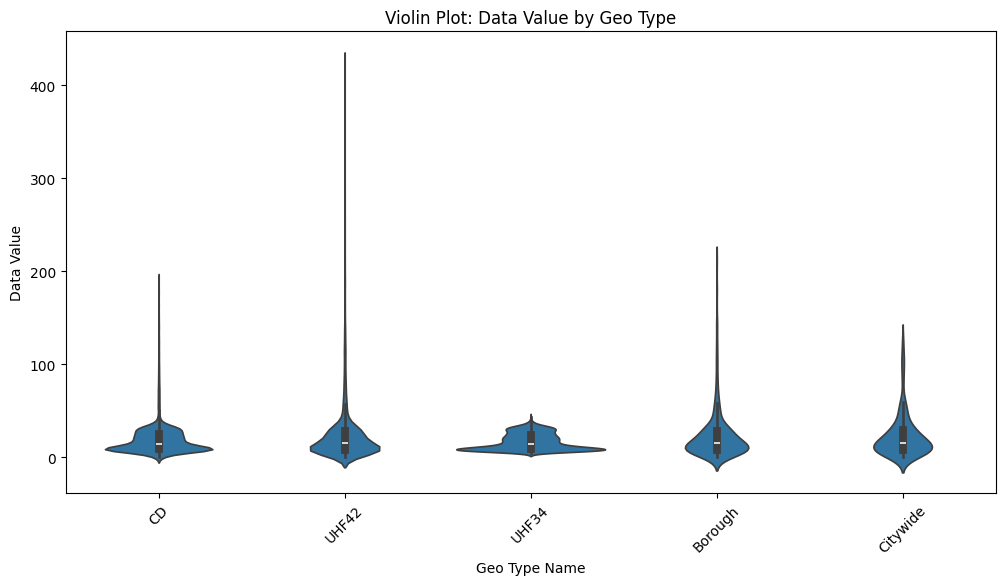

In [46]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Geo Type Name', y='Data Value', data=df)
plt.title("Violin Plot: Data Value by Geo Type")
plt.xticks(rotation=45)
plt.show()

In [47]:
df.to_csv("Cleaned_Air_Quality.csv", index=False)
